In [2]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.6


In [4]:
import pymc3.distributions.transforms as tr

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7184255820774968, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


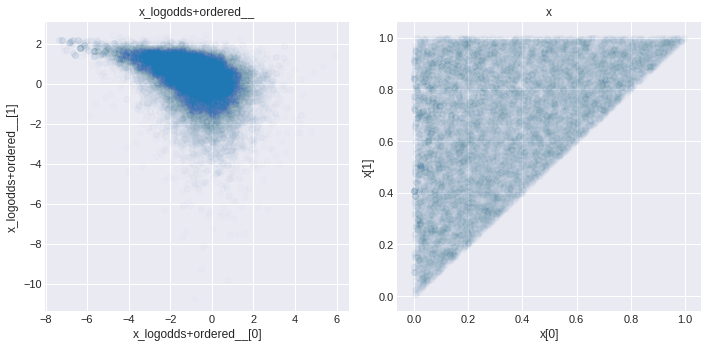

In [5]:
Order = tr.Ordered()
Logodd = tr.LogOdds()
chain_tran = tr.Chain([Logodd, Order])

with pm.Model() as m0:
    x = pm.Uniform(
        'x', 0., 1., shape=2,
        transform=chain_tran,
        testval=[0.1, 0.9])
    trace = pm.sample(5000, tune=1000, progressbar=False)

_, ax = plt.subplots(1, 2, figsize=(10, 5))
for ivar, varname in enumerate(trace.varnames):
    ax[ivar].scatter(trace[varname][:, 0], trace[varname][:, 1], alpha=.01)
    ax[ivar].set_xlabel(varname + '[0]')
    ax[ivar].set_ylabel(varname + '[1]')
    ax[ivar].set_title(varname)
plt.tight_layout()

In [10]:
trace.varnames

['x_logodds+ordered__', 'x']

In [59]:
w.shape

Shape.0

In [66]:
data= np.random.normal(3,1,1000)
print data.shape
with pm.Model() as m1:
    x1 = pm.Uniform.dist( lower= 0, upper=1)
    x2 = pm.Uniform.dist( lower= 5, upper=6)
    #w = pm.Dirichlet('w', np.ones(2),shape=2)
    #w2=pm.Categorical('w2', w,shape=2)
    w=pm.Pareto(alpha=1.0,m=1.0)
    w2=pm.Uniform()
    z=pm.Mixture('z', w2, [x1,x2],  observed=data)
    #z=pm.Mixture('z', w, [x1,x2],  observed=data)
    trace = pm.sample(5000, tune=1000, progressbar=False)



(1000,)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [w]
>BinaryGibbsMetropolis: [w2]


JoblibSamplingError: JoblibSamplingError
___________________________________________________________________________
...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7fea794b9a30, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/bo/min...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7fea794b9a30, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/bo/min...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1059                 self._events.update(event_pairs)
   1060                 while self._events:
   1061                     fd, events = self._events.popitem()
   1062                     try:
   1063                         fd_obj, handler_func = self._handlers[fd]
-> 1064                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
   1065                     except (OSError, IOError) as e:
   1066                         if errno_from_exception(e) == errno.EPIPE:
   1067                             # Happens when the client closes the connection
   1068                             pass

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 2, 4, 17, 54, 32, 761938, tzinfo=tzutc()), u'msg_id': u'6148d087af3f41398460048c0e2955f1', u'msg_type': u'execute_request', u'session': u'694e1556d6214c50a69c39df49a99702', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6148d087af3f41398460048c0e2955f1', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['694e1556d6214c50a69c39df49a99702']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 2, 4, 17, 54, 32, 761938, tzinfo=tzutc()), u'msg_id': u'6148d087af3f41398460048c0e2955f1', u'msg_type': u'execute_request', u'session': u'694e1556d6214c50a69c39df49a99702', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6148d087af3f41398460048c0e2955f1', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['694e1556d6214c50a69c39df49a99702'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2019, 2, 4, 17, 54, 32, 761938, tzinfo=tzutc()), u'msg_id': u'6148d087af3f41398460048c0e2955f1', u'msg_type': u'execute_request', u'session': u'694e1556d6214c50a69c39df49a99702', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'6148d087af3f41398460048c0e2955f1', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"data= np.random.normal(3,1,1000)\nprint data.s...m.sample(5000, tune=1000, progressbar=False)\n\n", store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Print object>, <_ast.With object>], cell_name='<ipython-input-66-c32eb750f3f4>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 7fea39ed3050, executi..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fea0afcde30, file "<ipython-input-66-c32eb750f3f4>", line 3>
        result = <ExecutionResult object at 7fea39ed3050, executi..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fea0afcde30, file "<ipython-input-66-c32eb750f3f4>", line 3>, result=<ExecutionResult object at 7fea39ed3050, executi..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fea0afcde30, file "<ipython-input-66-c32eb750f3f4>", line 3>
        self.user_global_ns = {'In': ['', u"get_ipython().magic(u'matplotlib inline')\nimp...t('Running on PyMC3 v{}'.format(pm.__version__))", u"get_ipython().magic(u'matplotlib inline')\nimp...t('Running on PyMC3 v{}'.format(pm.__version__))", u"Order = tr.Ordered()\nLogodd = tr.LogOdds()\nc... ax[ivar].set_title(varname)\nplt.tight_layout()", u'import pymc3.distributions.transforms as tr', u"Order = tr.Ordered()\nLogodd = tr.LogOdds()\nc... ax[ivar].set_title(varname)\nplt.tight_layout()", u'x', u'pm', u'm0', u'trace', u'trace.varnames', u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u'np.ones_like([1,1]', u'np.ones_like([1,1])', u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"_, ax = plt.subplots(1, 2, figsize=(10, 5))\nf... ax[ivar].set_title(varname)\nplt.tight_layout()", u'trace.varnames', ...], 'Logodd': <pymc3.distributions.transforms.LogOdds object>, 'N': 100, 'Order': <pymc3.distributions.transforms.Ordered object>, 'Out': {6: x, 7: <module 'pymc3' from '/home/bo/miniconda2/envs/p.../lib/python2.7/site-packages/pymc3/__init__.pyc'>, 8: <pymc3.model.Model object>, 9: <MultiTrace: 4 chains, 5000 iterations, 2 variables>, 10: ['x_logodds+ordered__', 'x'], 14: array([1, 1]), 19: ['x1_interval__', 'x2_interval__', 'w_stickbreaking__', 'w2', 'x1', 'x2', 'w'], 22: array([0, 1, 0, ..., 1, 0, 0]), 31: (10,), 34: w, ...}, 'P': array([0.57634088, 0.54597765, 0.52487455, 0.137... 0.72085777, 0.0699737 , 0.65265454, 0.04939551]), 'RV': z, '_': Shape.0, '_10': ['x_logodds+ordered__', 'x'], '_14': array([1, 1]), ...}
        self.user_ns = {'In': ['', u"get_ipython().magic(u'matplotlib inline')\nimp...t('Running on PyMC3 v{}'.format(pm.__version__))", u"get_ipython().magic(u'matplotlib inline')\nimp...t('Running on PyMC3 v{}'.format(pm.__version__))", u"Order = tr.Ordered()\nLogodd = tr.LogOdds()\nc... ax[ivar].set_title(varname)\nplt.tight_layout()", u'import pymc3.distributions.transforms as tr', u"Order = tr.Ordered()\nLogodd = tr.LogOdds()\nc... ax[ivar].set_title(varname)\nplt.tight_layout()", u'x', u'pm', u'm0', u'trace', u'trace.varnames', u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u'np.ones_like([1,1]', u'np.ones_like([1,1])', u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"with pm.Model() as m1:\n    x1 = pm.Uniform('x... = pm.sample(5000, tune=1000, progressbar=False)", u"_, ax = plt.subplots(1, 2, figsize=(10, 5))\nf... ax[ivar].set_title(varname)\nplt.tight_layout()", u'trace.varnames', ...], 'Logodd': <pymc3.distributions.transforms.LogOdds object>, 'N': 100, 'Order': <pymc3.distributions.transforms.Ordered object>, 'Out': {6: x, 7: <module 'pymc3' from '/home/bo/miniconda2/envs/p.../lib/python2.7/site-packages/pymc3/__init__.pyc'>, 8: <pymc3.model.Model object>, 9: <MultiTrace: 4 chains, 5000 iterations, 2 variables>, 10: ['x_logodds+ordered__', 'x'], 14: array([1, 1]), 19: ['x1_interval__', 'x2_interval__', 'w_stickbreaking__', 'w2', 'x1', 'x2', 'w'], 22: array([0, 1, 0, ..., 1, 0, 0]), 31: (10,), 34: w, ...}, 'P': array([0.57634088, 0.54597765, 0.52487455, 0.137... 0.72085777, 0.0699737 , 0.65265454, 0.04939551]), 'RV': z, '_': Shape.0, '_10': ['x_logodds+ordered__', 'x'], '_14': array([1, 1]), ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
/home/bo/mydev/lanlep2019/notebook/1/<ipython-input-66-c32eb750f3f4> in <module>()
      5     x2 = pm.Uniform.dist( lower= 5, upper=6)
      6     w = pm.Dirichlet('w', np.ones(2),shape=2)
      7     w2=pm.Categorical('w2', w,shape=2)
      8     z=pm.Mixture('z', w2, [x1,x2],  observed=data)
      9     #z=pm.Mixture('z', w, [x1,x2],  observed=data)
---> 10     trace = pm.sample(5000, tune=1000, progressbar=False)
     11 

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/sampling.py in sample(draws=6000, step=<pymc3.step_methods.compound.CompoundStep object>, init='auto', n_init=200000, start=[{}, {}, {}, {}], trace=None, chain_idx=0, chains=4, cores=4, tune=1000, nuts_kwargs=None, step_kwargs=None, progressbar=False, model=<pymc3.model.Model object>, random_seed=[621660002, 475637743, 731940912, 241201768], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, compute_convergence_checks=True, use_mmap=False, **kwargs={})
    434         parallel = cores > 1 and chains > 1 and not has_population_samplers
    435         if parallel:
    436             _log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, cores))
    437             _print_step_hierarchy(step)
    438             try:
--> 439                 trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 4, 'cores': 4, 'draws': 6000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': False, 'random_seed': [621660002, 475637743, 731940912, 241201768], 'start': [{}, {}, {}, {}], ...}
    440             except pickle.PickleError:
    441                 _log.warning("Could not pickle model, sampling singlethreaded.")
    442                 _log.debug('Pickling error:', exec_info=True)
    443                 parallel = False

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/sampling.py in _mp_sample(draws=6000, tune=1000, step=<pymc3.step_methods.compound.CompoundStep object>, chains=4, cores=4, chain=0, random_seed=[621660002, 475637743, 731940912, 241201768], start=[{}, {}, {}, {}], progressbar=False, trace=None, model=<pymc3.model.Model object>, use_mmap=False, **kwargs={'live_plot': False, 'live_plot_kwargs': None})
   1027             for args in zip(chain_nums, pbars, random_seed, start)
   1028         )
   1029         if use_mmap:
   1030             traces = Parallel(n_jobs=cores)(jobs)
   1031         else:
-> 1032             traces = Parallel(n_jobs=cores, mmap_mode=None)(jobs)
        traces = undefined
        cores = 4
        jobs = <generator object <genexpr>>
   1033         return MultiTrace(traces)
   1034 
   1035 
   1036 def _choose_chains(traces, tune):

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    957                 # No need to wait for async callbacks to trigger to
    958                 # consumption.
    959                 self._iterating = False
    960 
    961             with self._backend.retrieval_context():
--> 962                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    963             # Make sure that we get a last message telling us we are done
    964             elapsed_time = time.time() - self._start_time
    965             self._print('Done %3i out of %3i | elapsed: %s finished',
    966                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
SamplingError                                      Mon Feb  4 12:54:42 2019
PID: 793        Python 2.7.15: /home/bo/miniconda2/envs/python27/bin/python
...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    219         self._pickle_cache = pickle_cache
    220 
    221     def __call__(self):
    222         with parallel_backend(self._backend):
    223             return [func(*args, **kwargs)
--> 224                     for func, args, kwargs in self.items]
        func = <function _sample>
        args = []
        kwargs = {'chain': 0, 'draws': 6000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': False, 'random_seed': 621660002, 'start': {'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}, 'step': <pymc3.step_methods.compound.CompoundStep object>, 'trace': None, ...}
        self.items = [(<function _sample>, [], {'chain': 0, 'draws': 6000, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'progressbar': False, 'random_seed': 621660002, 'start': {'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}, 'step': <pymc3.step_methods.compound.CompoundStep object>, 'trace': None, ...})]
    225 
    226     def __len__(self):
    227         return self._size
    228 

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/sampling.py in _sample(chain=0, progressbar=False, random_seed=621660002, start={'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}, draws=6000, step=<pymc3.step_methods.compound.CompoundStep object>, trace=None, tune=1000, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={})
    544                             tune, model, random_seed)
    545     if progressbar:
    546         sampling = tqdm(sampling, total=draws)
    547     try:
    548         strace = None
--> 549         for it, strace in enumerate(sampling):
        it = undefined
        strace = None
        sampling = <generator object _iter_sample>
    550             if live_plot:
    551                 if live_plot_kwargs is None:
    552                     live_plot_kwargs = {}
    553                 if it >= skip_first:

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/sampling.py in _iter_sample(draws=6000, step=<pymc3.step_methods.compound.CompoundStep object>, start={'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}, trace=None, chain=0, tune=1000, model=<pymc3.model.Model object>, random_seed=621660002)
    640         step.tune = bool(tune)
    641         for i in range(draws):
    642             if i == tune:
    643                 step = stop_tuning(step)
    644             if step.generates_stats:
--> 645                 point, states = step.step(point)
        point = {'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}
        states = undefined
        step.step = <bound method CompoundStep.step of <pymc3.step_methods.compound.CompoundStep object>>
    646                 if strace.supports_sampler_stats:
    647                     strace.record(point, states)
    648                 else:
    649                     strace.record(point)

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/step_methods/compound.py in step(self=<pymc3.step_methods.compound.CompoundStep object>, point={'w2': array([0, 0]), 'w_stickbreaking__': array([0.])})
     22     def step(self, point):
     23         if self.generates_stats:
     24             states = []
     25             for method in self.methods:
     26                 if method.generates_stats:
---> 27                     point, state = method.step(point)
        point = {'w2': array([0, 0]), 'w_stickbreaking__': array([0.])}
        state = undefined
        method.step = <bound method NUTS.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
     28                     states.extend(state)
     29                 else:
     30                     point = method.step(point)
     31             # Model logp can only be the logp of the _last_ state, if there is

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'w2': array([0, 0]), 'w_stickbreaking__': array([0.])})
    242     def step(self, point):
    243         self._logp_dlogp_func.set_extra_values(point)
    244         array = self._logp_dlogp_func.dict_to_array(point)
    245 
    246         if self.generates_stats:
--> 247             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method NUTS.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([0.])
    248             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    249             return point, stats
    250         else:
    251             apoint = self.astep(array)

...........................................................................
/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/pymc3/step_methods/hmc/base_hmc.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([0.]))
    144                 self.iter_count,
    145                 None,
    146                 None,
    147             )
    148             self._warnings.append(warning)
--> 149             raise SamplingError("Bad initial energy")
    150 
    151         adapt_step = self.tune and self.adapt_step_size
    152         step_size = self.step_adapt.current(adapt_step)
    153         self.step_size = step_size

SamplingError: Bad initial energy
___________________________________________________________________________

In [67]:
for RV in m1.basic_RVs:
    print(RV.name, RV.logp(m1.test_point))

('w_stickbreaking__', array(-1.38629436))
('w2', array(-1.38629436))
('z', array(-inf))


In [ ]:
trace.varnames

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [263]:
txt="""
0	4.017
0.5	3.555
1	3.163
1.5	2.841
2	2.589
2.5	2.407
3	2.295
3.5	2.257
4	2.281
4.5	2.379
5	2.532
6	2.943
7	3.494
8	4.185
9	5.017
10	5.982
11	6.982

"""
txt=[u.split() for u in txt.split("\n") if not  u.startswith('#')]
txt=[u for u in txt if u  ]
data=pd.DataFrame(txt,columns=['v','score']).astype(np.float)
data

v  score
0    0.0  4.017
1    0.5  3.555
2    1.0  3.163
3    1.5  2.841
4    2.0  2.589
5    2.5  2.407
6    3.0  2.295
7    3.5  2.257
8    4.0  2.281
9    4.5  2.379
10   5.0  2.532
11   6.0  2.943
12   7.0  3.494
13   8.0  4.185
14   9.0  5.017
15  10.0  5.982
16  11.0  6.982

In [264]:
txt="""
0	0.5
0.5	1
1	1.5
1.5	2
2	2.5
2.5	3
3	3.5
3.5	4
4	4.5
4.5	5
5	6
6	7
7	8
8	9
9	10
10	11

"""
txt=[u.split() for u in txt.split("\n") if not  u.startswith('#')]
txt=[u for u in txt if u]
intervals=np.array(txt).astype(np.float)
intervals1=intervals[:,0]
intervals2=intervals[:,1]
intervals1,intervals2

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         6. ,  7. ,  8. ,  9. , 10. ]),
 array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  6. ,
         7. ,  8. ,  9. , 10. , 11. ]))

In [265]:
txt="""
0.0084163898
0.0239202658
0.0394241417
0.0549280177
0.0704318937
0.0859357697
0.1023255814
0.1054263566
0.0890365449
0.076854928
0.1304540421
0.0994462901
0.0684385382
0.0372093023
0.007751938
0


"""
txt=[u for u in txt.split() if not  u.startswith('#')]
txt=[u for u in txt if u]
guessed_prob=np.array(txt).astype(np.float)
guessed_prob,sum(guessed_prob), len(guessed_prob)

(array([0.00841639, 0.02392027, 0.03942414, 0.05492802, 0.07043189,
        0.08593577, 0.10232558, 0.10542636, 0.08903654, 0.07685493,
        0.13045404, 0.09944629, 0.06843854, 0.0372093 , 0.00775194,
        0.        ]), 1.0000000000000002, 16)

In [266]:
bins=len(intervals)
bins

16

In [267]:
tf.reset_default_graph()

In [268]:
#x=tf.Variable(np.ones(bins))
#x=tf.Variable(np.random.normal(size=bins))
x=tf.Variable(guessed_prob)

In [269]:
prob=tf.nn.softmax(x)

In [270]:
prob,bins,len(data)

(<tf.Tensor 'Reshape_1:0' shape=(16,) dtype=float64>, 16, 17)

In [271]:
len(losses)

12

In [272]:
losses=[]
losses0=[]
losses1=[]
for v,s in data.values:
    print v,s
    a=(intervals1-v)
    b=(v-intervals2)
    ind1 = tf.cast(a>=0,tf.float64) #v below bin 
    ind2 = tf.cast(b>=0,tf.float64) #v above bin
    ind3 = tf.cast( (b<0) & (a<0),tf.float64) #v is between
    m =(intervals2-intervals1)/2.0
    thisloss0= (ind1*(a+m) + ind2*(b+m) + ind3*(tf.abs(tf.abs(a)-tf.abs(b))))
    losses0.append(thisloss0)
    thisloss1= tf.reduce_sum(thisloss0*prob)
    losses1.append(thisloss1)
    losses.append((thisloss1-s)**2)
    #break
loss_a= tf.reduce_sum(losses) 
alpha=0.2
loss= loss_a+tf.reduce_sum((prob-guessed_prob)**2)*alpha

0.0 4.017
0.5 3.555
1.0 3.163
1.5 2.841
2.0 2.589
2.5 2.407
3.0 2.295
3.5 2.257
4.0 2.281
4.5 2.379
5.0 2.532
6.0 2.943
7.0 3.494
8.0 4.185
9.0 5.017
10.0 5.982
11.0 6.982


In [249]:
sess.run(prob-guessed_prob)

array([ 0.11190326,  0.04860024, -0.01561606, -0.05601973, -0.06812434,
       -0.05770475, -0.02902296,  0.00550575,  0.03011037,  0.0272659 ,
        0.01143018])

In [250]:
sess.run([loss, loss_a,loss-loss_a])

[0.007475671051372786, 0.001697567632129883, 0.005778103419242903]

In [278]:
zip(intervals,np.round(sess.run(prob),3))

[(array([0. , 0.5]), 0.071),
 (array([0.5, 1. ]), 0.072),
 (array([1. , 1.5]), 0.071),
 (array([1.5, 2. ]), 0.07),
 (array([2. , 2.5]), 0.07),
 (array([2.5, 3. ]), 0.069),
 (array([3. , 3.5]), 0.072),
 (array([3.5, 4. ]), 0.074),
 (array([4. , 4.5]), 0.06),
 (array([4.5, 5. ]), 0.037),
 (array([5., 6.]), 0.08),
 (array([6., 7.]), 0.065),
 (array([7., 8.]), 0.072),
 (array([8., 9.]), 0.077),
 (array([ 9., 10.]), 0.04),
 (array([10., 11.]), 0.002)]

In [258]:
sess.run([loss, loss_a,loss-loss_a])

[0.006487905250376858, 0.00018429983199109114, 0.0063036054183857665]

In [275]:
zip(np.round(guessed_prob,3),np.round(sess.run(prob),3))

[(0.008, 0.071),
 (0.024, 0.072),
 (0.039, 0.071),
 (0.055, 0.07),
 (0.07, 0.07),
 (0.086, 0.069),
 (0.102, 0.072),
 (0.105, 0.074),
 (0.089, 0.06),
 (0.077, 0.037),
 (0.13, 0.08),
 (0.099, 0.065),
 (0.068, 0.072),
 (0.037, 0.077),
 (0.008, 0.04),
 (0.0, 0.002)]

In [276]:
zip(np.round(guessed_prob*341,0),np.round(sess.run(prob)*341,0))

[(3.0, 24.0),
 (8.0, 25.0),
 (13.0, 24.0),
 (19.0, 24.0),
 (24.0, 24.0),
 (29.0, 24.0),
 (35.0, 25.0),
 (36.0, 25.0),
 (30.0, 21.0),
 (26.0, 13.0),
 (44.0, 27.0),
 (34.0, 22.0),
 (23.0, 24.0),
 (13.0, 26.0),
 (3.0, 14.0),
 (0.0, 1.0)]

In [277]:
print sess.run([loss, loss_a,loss-loss_a])
zip(np.round(guessed_prob,3),np.round(sess.run(prob),3))

[0.003822218960095932, 0.000151668446975556, 0.003670550513120376]


[(0.008, 0.071),
 (0.024, 0.072),
 (0.039, 0.071),
 (0.055, 0.07),
 (0.07, 0.07),
 (0.086, 0.069),
 (0.102, 0.072),
 (0.105, 0.074),
 (0.089, 0.06),
 (0.077, 0.037),
 (0.13, 0.08),
 (0.099, 0.065),
 (0.068, 0.072),
 (0.037, 0.077),
 (0.008, 0.04),
 (0.0, 0.002)]

In [255]:
zip(data.values,np.round(np.sum(sess.run(losses0*prob),1),3))

[(array([0.   , 4.017]), 4.034),
 (array([1.   , 3.163]), 3.17),
 (array([2.   , 2.589]), 2.583),
 (array([3.   , 2.295]), 2.277),
 (array([4.   , 2.281]), 2.271),
 (array([5.   , 2.532]), 2.52),
 (array([6.   , 2.943]), 2.937),
 (array([7.   , 3.494]), 3.494),
 (array([8.   , 4.185]), 4.195),
 (array([9.   , 5.017]), 5.035),
 (array([10.   ,  5.982]), 5.977),
 (array([11.   ,  6.982]), 6.966)]

In [273]:

opt = tf.train.AdamOptimizer()
train = opt.minimize(loss)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [274]:
 
for step in xrange(20000):
    sess.run(train)
    if step % 1000 == 0:
        print(step, sess.run(loss))

(0, 2.295870951730989)
(1000, 0.05185821975961624)
(2000, 0.03205021231959495)
(3000, 0.01783966396191425)
(4000, 0.011395362090688711)
(5000, 0.008483107236995148)
(6000, 0.00672340423251387)
(7000, 0.005628762750311572)
(8000, 0.004946929930418768)
(9000, 0.0044778085339904124)
(10000, 0.0041970528276730305)
(11000, 0.004068768509765529)
(12000, 0.004008716024169417)
(13000, 0.0039590213139446785)
(14000, 0.003911975396242189)
(15000, 0.0038755659966172255)
(16000, 0.003851965798505908)
(17000, 0.003837965617131426)
(18000, 0.003829775810864508)
(19000, 0.003824988207175429)
